# <span style='font-family:"Times New Roman"'> Image Sharpening using the Laplacian, Unsharp Masking, and Highboost Filtering

# <span style='font-family:"Times New Roman"'> Loading required modules:

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from skimage import exposure
import scipy.ndimage.filters
from scipy import ndimage

In [2]:
I = mpimg.imread('blurry-moon.tif')

In [3]:
smallest = np.amin(I)
biggest = np.amax(I)
print("Minimum value is:")
print(smallest)
print("Maximum value is:")
print(biggest)

Minimum value is:
0
Maximum value is:
255


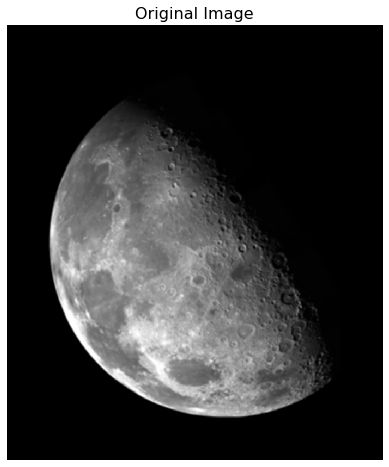

In [4]:
fig = plt.figure(figsize=(8, 8))
img=plt.imshow(I,cm.gray,vmin=np.iinfo(np.uint8).min,vmax=np.iinfo(np.uint8).max)
plt.title('Original Image', fontsize = 16)
plt.axis('off')
plt.show()

In [5]:
I = I - np.amin(I)
I = (I/(np.amax(I))) * 255

In [6]:
kernel = np.ones((3,3))*(-1)
kernel[1,1] = 8

In [7]:
LapSharpI = scipy.ndimage.filters.convolve(I, kernel) #Convolution of the image with the kernel:

In [8]:
smallest = np.amin(LapSharpI)
biggest = np.amax(LapSharpI)
print("Minimum value is:")
print(smallest)
print("Maximum value is:")
print(biggest)

Minimum value is:
-125.0
Maximum value is:
149.0


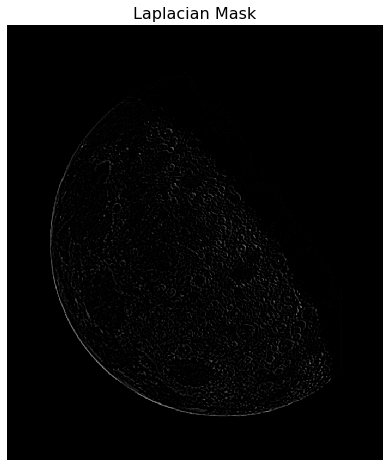

In [9]:
fig = plt.figure(figsize=(8, 8))
img=plt.imshow(LapSharpI,cm.gray,vmin=np.iinfo(np.uint8).min,vmax=np.iinfo(np.uint8).max)
plt.title('Laplacian Mask', fontsize = 16)
plt.axis('off')
plt.show()

In [10]:
SharpILap= I + LapSharpI

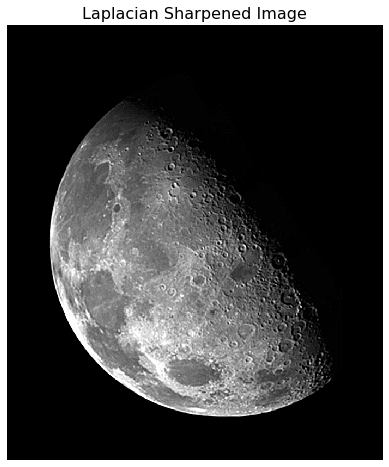

In [11]:
fig = plt.figure(figsize=(8, 8))
img=plt.imshow(SharpILap,cm.gray,vmin=np.iinfo(np.uint8).min,vmax=np.iinfo(np.uint8).max)
plt.title('Laplacian Sharpened Image', fontsize = 16)
plt.axis('off')
plt.show()

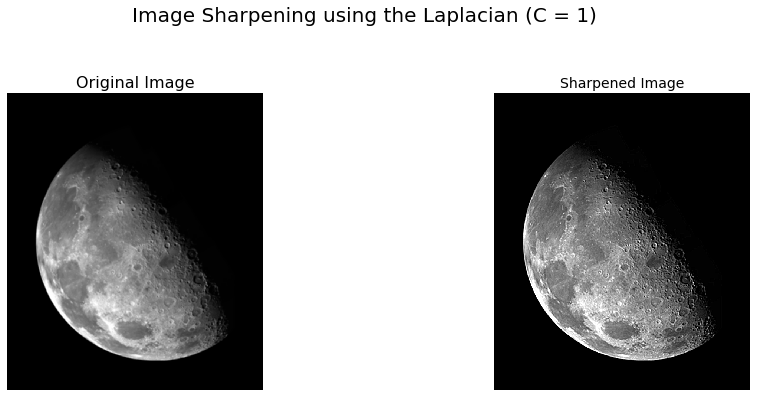

In [12]:
fig = plt.figure(figsize=(16, 12))
plt.subplot(2, 2, 1)
img=plt.imshow(I,cm.gray,vmin=np.iinfo(np.uint8).min,vmax=np.iinfo(np.uint8).max)
plt.title('Original Image', fontsize = 16)
plt.axis('off')
plt.subplot(2, 2, 2)
img=plt.imshow(SharpILap,cm.gray,vmin=np.iinfo(np.uint8).min,vmax=np.iinfo(np.uint8).max)
plt.title('Sharpened Image', fontsize = 14)
plt.axis('off')
fig.suptitle('Image Sharpening using the Laplacian (C = 1)', fontsize = 20)
plt.show()

In [13]:
kernel = np.ones((3,3))
kernel[1,1] = -8

In [14]:
LapSharpI = scipy.ndimage.filters.convolve(I, kernel) #Convolution of the image with the kernel:

In [15]:
smallest = np.amin(LapSharpI)
biggest = np.amax(LapSharpI)
print("Minimum value is:")
print(smallest)
print("Maximum value is:")
print(biggest)

Minimum value is:
-149.0
Maximum value is:
125.0


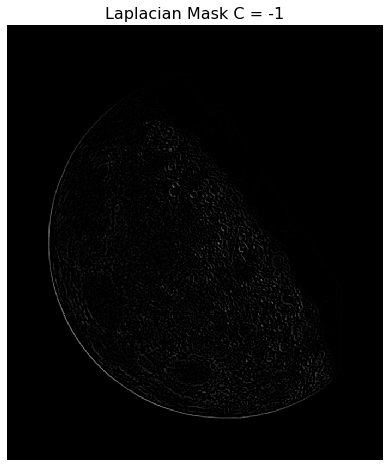

In [16]:
fig = plt.figure(figsize=(8, 8))
img=plt.imshow(LapSharpI,cm.gray,vmin=np.iinfo(np.uint8).min,vmax=np.iinfo(np.uint8).max)
plt.title('Laplacian Mask C = -1', fontsize = 16)
plt.axis('off')
plt.show()

In [17]:
SharpILapb= I + LapSharpI

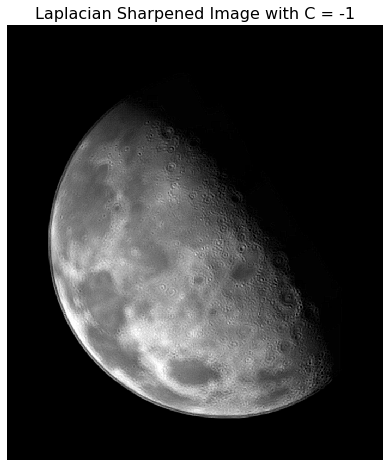

In [18]:
fig = plt.figure(figsize=(8, 8))
img=plt.imshow(SharpILapb,cm.gray,vmin=np.iinfo(np.uint8).min,vmax=np.iinfo(np.uint8).max)
plt.title('Laplacian Sharpened Image with C = -1', fontsize = 16)
plt.axis('off')
plt.show()

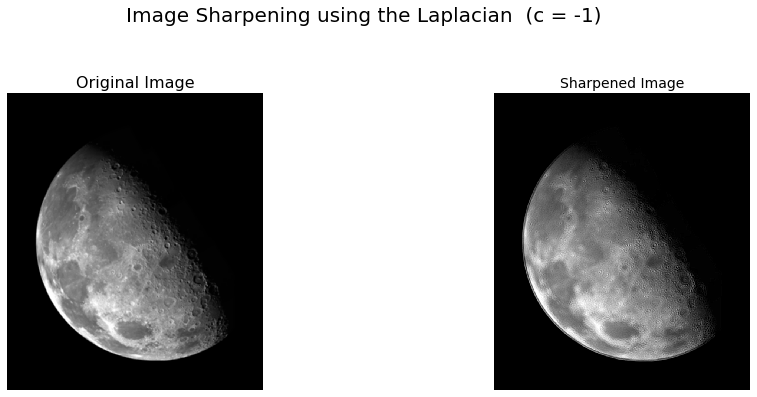

In [19]:
fig = plt.figure(figsize=(16, 12))
plt.subplot(2, 2, 1)
img=plt.imshow(I,cm.gray,vmin=np.iinfo(np.uint8).min,vmax=np.iinfo(np.uint8).max)
plt.title('Original Image', fontsize = 16)
plt.axis('off')
plt.subplot(2, 2, 2)
img=plt.imshow(SharpILapb,cm.gray,vmin=np.iinfo(np.uint8).min,vmax=np.iinfo(np.uint8).max)
plt.title('Sharpened Image', fontsize = 14)
plt.axis('off')
fig.suptitle('Image Sharpening using the Laplacian  (c = -1)', fontsize = 20)
plt.show()

<span style='font-family:"Times New Roman"'> By using wrong size, the resulting image is getting blurred with some artifacts on it. 

In [20]:
I_Gauss = ndimage.filters.gaussian_filter(I, 10, truncate=6)

<span style='font-family:"Times New Roman"'> Based on two images differences, the standard deviation should be almost 1.9 times the value used in book. Here, standard deviation equal to 2 times of reported standard deviation is implemented. 

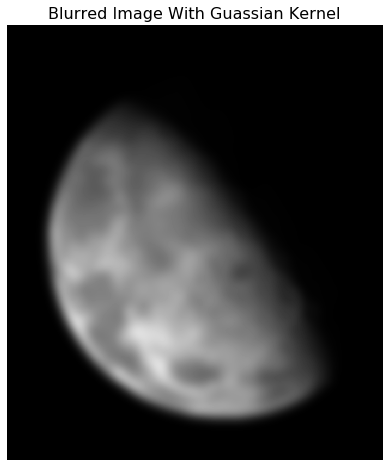

In [21]:
fig = plt.figure(figsize=(8, 8))
img=plt.imshow(I_Gauss,cmap='gray',vmin=np.iinfo(np.uint8).min,vmax=np.iinfo(np.uint8).max)
plt.title('Blurred Image With Guassian Kernel', fontsize = 16)
plt.axis('off')
plt.show()

In [22]:
mask = I - I_Gauss

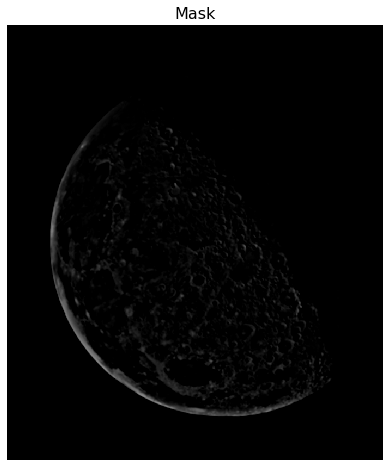

In [23]:
fig = plt.figure(figsize=(8, 8))
img=plt.imshow(mask,cmap='gray',vmin=np.iinfo(np.uint8).min,vmax=np.iinfo(np.uint8).max)
plt.title('Mask', fontsize = 16)
plt.axis('off')
plt.show()

In [24]:
highboost = I + mask
highboost3 = I + 3*mask
highboost5 = I + 5*mask
highboost7 = I + 7*mask
highboost9 = I + 9*mask
highboost11 = I + 11*mask
highboost13 = I + 13*mask

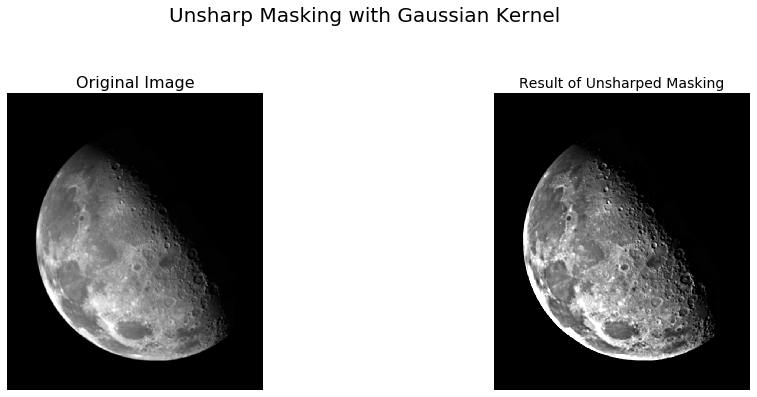

In [25]:
fig = plt.figure(figsize=(16, 12))
plt.subplot(2, 2, 1)
img=plt.imshow(I,cm.gray,vmin=np.iinfo(np.uint8).min,vmax=np.iinfo(np.uint8).max)
plt.title('Original Image', fontsize = 16)
plt.axis('off')
plt.subplot(2, 2, 2)
img=plt.imshow(highboost,cmap='gray',vmin=np.iinfo(np.uint8).min,vmax=np.iinfo(np.uint8).max)
plt.title('Result of Unsharped Masking', fontsize = 14)
plt.axis('off')
fig.suptitle('Unsharp Masking with Gaussian Kernel', fontsize = 20)
plt.show()

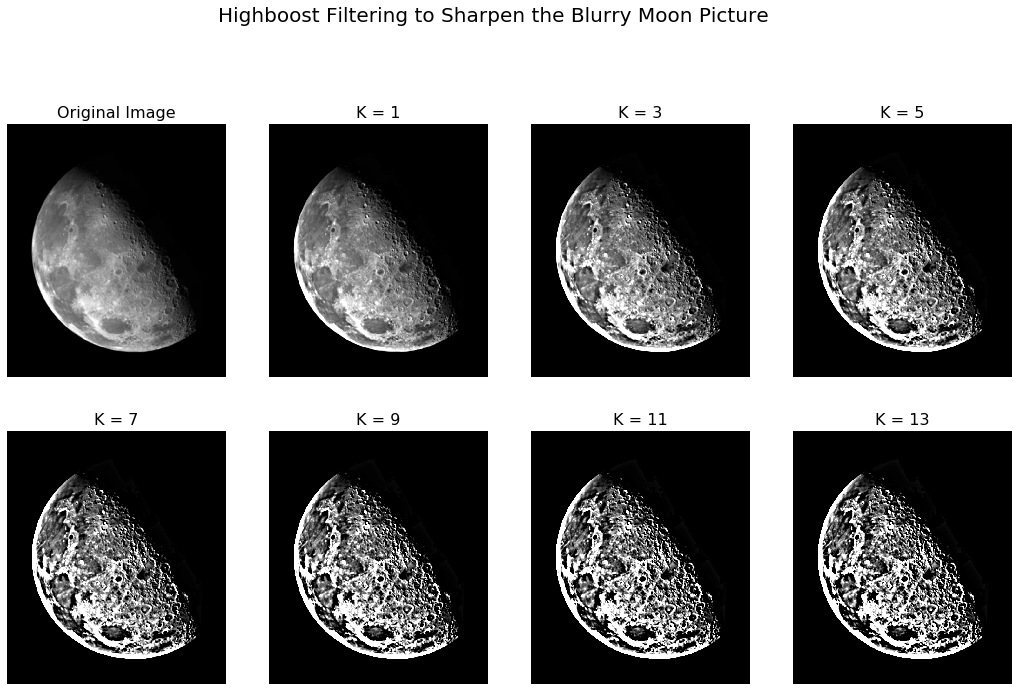

In [26]:
fig = plt.figure(figsize=(18, 16))
plt.subplot(3, 4, 1)
img=plt.imshow(I,cm.gray,vmin=np.iinfo(np.uint8).min,vmax=np.iinfo(np.uint8).max)
plt.title('Original Image', fontsize = 16)
plt.axis('off')
plt.subplot(3, 4, 2)
plt.imshow(highboost,cmap='gray',vmin=np.iinfo(np.uint8).min,vmax=np.iinfo(np.uint8).max)
plt.title('K = 1', fontsize = 16)
plt.axis('off')
plt.subplot(3, 4, 3)
plt.imshow(highboost3,cmap='gray',vmin=np.iinfo(np.uint8).min,vmax=np.iinfo(np.uint8).max)
plt.title('K = 3', fontsize = 16)
plt.axis('off')
plt.subplot(3, 4, 4)
plt.imshow(highboost5,cmap='gray',vmin=np.iinfo(np.uint8).min,vmax=np.iinfo(np.uint8).max)
plt.title('K = 5', fontsize = 16)
plt.axis('off')
plt.subplot(3, 4, 5)
plt.imshow(highboost7,cmap='gray',vmin=np.iinfo(np.uint8).min,vmax=np.iinfo(np.uint8).max)
plt.title('K = 7', fontsize = 16)
plt.axis('off')
plt.subplot(3, 4, 6)
plt.imshow(highboost9,cmap='gray',vmin=np.iinfo(np.uint8).min,vmax=np.iinfo(np.uint8).max)
plt.title('K = 9', fontsize = 16)
plt.axis('off')
plt.subplot(3, 4, 7)
plt.imshow(highboost11,cmap='gray',vmin=np.iinfo(np.uint8).min,vmax=np.iinfo(np.uint8).max)
plt.title('K = 11', fontsize = 16)
plt.axis('off')
plt.subplot(3, 4, 8)
plt.imshow(highboost13,cmap='gray',vmin=np.iinfo(np.uint8).min,vmax=np.iinfo(np.uint8).max)
plt.title('K = 13', fontsize = 16)
plt.axis('off')
fig.suptitle('Highboost Filtering to Sharpen the Blurry Moon Picture', fontsize = 20)
plt.show()

<span style='font-family:"Times New Roman"'> For highboost filtering, K value up to 3 result in acceptable boosting level. As the K value increases, some unacceptable artifacts start to appear and make the boost image unacceptable. 

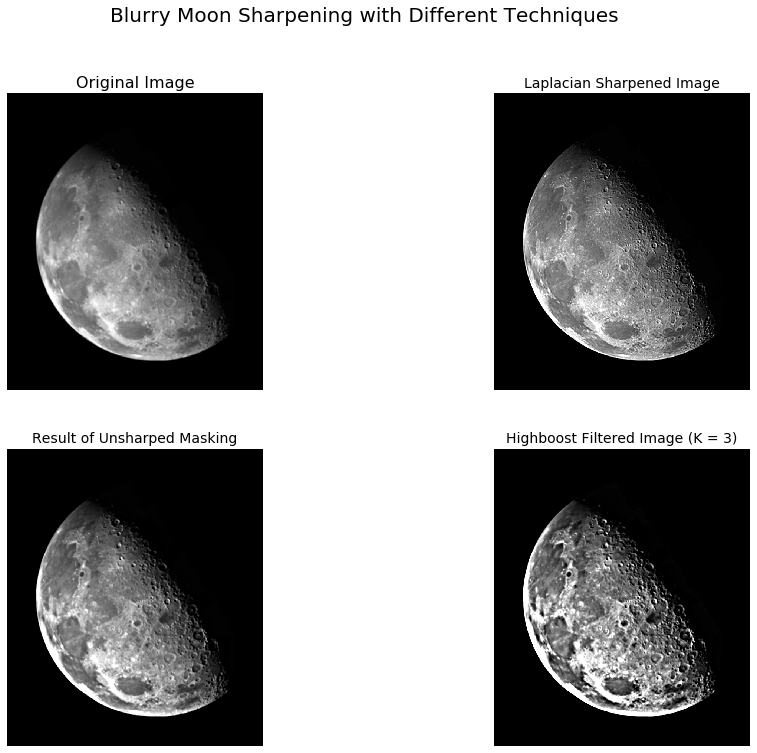

In [27]:
fig = plt.figure(figsize=(16, 12))
plt.subplot(2, 2, 1)
img=plt.imshow(I,cm.gray,vmin=np.iinfo(np.uint8).min,vmax=np.iinfo(np.uint8).max)
plt.title('Original Image', fontsize = 16)
plt.axis('off')
plt.subplot(2, 2, 2)
img=plt.imshow(SharpILap,cm.gray,vmin=np.iinfo(np.uint8).min,vmax=np.iinfo(np.uint8).max)
plt.title('Laplacian Sharpened Image', fontsize = 14)
plt.axis('off')
plt.subplot(2, 2, 3)
img=plt.imshow(highboost,cmap='gray',vmin=np.iinfo(np.uint8).min,vmax=np.iinfo(np.uint8).max)
plt.title('Result of Unsharped Masking', fontsize = 14)
plt.axis('off')
plt.subplot(2, 2, 4)
plt.imshow(highboost3,cmap='gray',vmin=np.iinfo(np.uint8).min,vmax=np.iinfo(np.uint8).max)
plt.title('Highboost Filtered Image (K = 3)', fontsize = 14)
plt.axis('off')
fig.suptitle('Blurry Moon Sharpening with Different Techniques', fontsize = 20)
plt.show()

<span style='font-family:"Times New Roman"'> Laplacian sharpened image is an improved version of the original blurred image and doing a good job in sharpening the image. When (K = 1), the resulted image is sharpened successfully.  In the same way, highboost filtering (K=3) is improving the quality of the image and, it makes the boundaries of the image bold. This feature is nonexistent in Laplacian method. 